grb_rate_unlensed_median/grb_rate_lensed_median, grb_rate_unlensed_median, grb_rate_lensed_median
= (2360.5358178457086, 12045.457829739751, 5.102848996687868)

In [1]:
from ler.utils import get_param_from_json
import numpy as np

lens_param_n = get_param_from_json('ler_data/n_lensed_params_detectable_grb_median.json')

In [2]:
# 3 images
# add accross all images
snr = lens_param_n['pdet_net']==1.

# add accross all images
num_ = np.sum(snr, axis=1)
# select only 3 images detectable events, for 3 image and 4 image events
idx = num_ == 3

# get time information
dt_eff = lens_param_n['effective_geocent_time'][idx]
snr = lens_param_n['pdet_net'][idx]
mu = lens_param_n['magnifications'][idx]

dt_3images_10 = []
dt_3images_21 = []
for i, dt in enumerate(dt_eff):
    # detected images
    ii = np.where(snr[i] == 1)[0]
    ii = np.sort(ii)

    # image 1,0
    dt_3images_10.append(abs(dt[ii[1]]-dt[ii[0]]))
    # image 2,1
    dt_3images_21.append(abs(dt[ii[2]]-dt[ii[1]]))
        
dt_3images_10 = np.array(dt_3images_10)
dt_3images_21 = np.array(dt_3images_21)

In [3]:
# number of 3 images events and 4 images events
mu = ~np.isnan(lens_param_n['magnifications'])[idx]
num_3img, num_4img, num_detected, total_events = np.sum(np.sum(mu, axis=1)==3), np.sum(np.sum(mu, axis=1)==4), np.sum(idx), len(idx)

# percentage of 3 images events
perc_3img = num_3img/total_events * 100
# percentage of 4 images events
perc_4img = num_4img/total_events * 100

# print the results
print(f"Number of 3 images events: {num_3img}, Percentage: {perc_3img:.2f}%")
print(f"Number of 4 images events: {num_4img}, Percentage: {perc_4img:.2f}%")
print(f"Total number of detected events: {num_detected}, Total events: {total_events}")

Number of 3 images events: 94, Percentage: 0.61%
Number of 4 images events: 1412, Percentage: 9.17%
Total number of detected events: 1506, Total events: 15392


In [6]:
unlensed_params_detectable = get_param_from_json("ler_data/n_unlensed_params_detectable_grb_median.json")

In [7]:
# simulating time delay difference and magnification ratio, for unlensed population
size = 10000

t = unlensed_params_detectable["geocent_time"]
mu = unlensed_params_detectable["luminosity_distance"]

len_ = len(t)
t_ = []
mu_ = []
idx1 = np.random.choice(np.arange(0,len_), size, replace=False)
idx2 = np.random.choice(np.arange(0,len_), size, replace=False)
t_.append(t[idx2] - t[idx1])
mu_.append(mu[idx2] / mu[idx1])

dt_ul = np.abs(np.array(t_).flatten())
dmu_ul = np.abs(np.array(mu_).flatten())**2

In [ ]:
# event
dt_10 = 13*60*60 + 56*60 + 5.77 - (13*60*60 + 9*60 + 2.03)
dt_21 = 16*60*60 + 21*60 + 33.07 - (13*60*60 + 56*60 + 5.77)
print(f"dt_10 = {dt_10/60} mins")
print(f"dt_21 = {dt_21/60} mins")

dt_10 = 47.0623333333333 mins
dt_21 = 145.45500000000004 mins


In [10]:
dt_ul

array([ 3476356.6842463 , 25990208.74006963,  2246083.96873832,
       ..., 12077119.95626998,  2605347.51607752,
       21898106.87743402])

dt_10 = -1.485689036559331 mins
dt_21 = -0.9956338374294144 mins


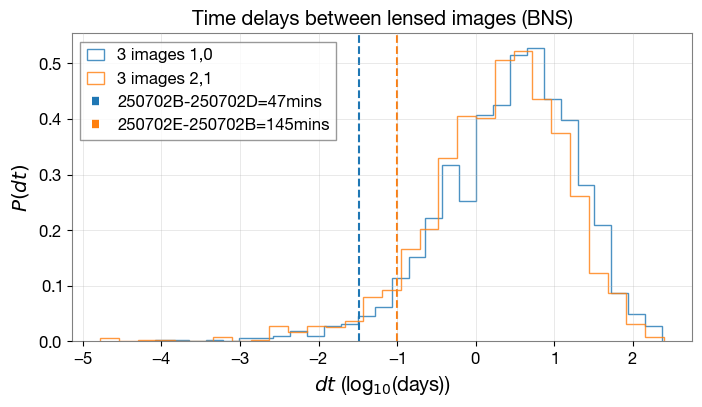

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# events

dt_10 = 13*60*60 + 56*60 + 5.77 - (13*60*60 + 9*60 + 2.03)
dt_21 = 16*60*60 + 21*60 + 33.07 - (13*60*60 + 56*60 + 5.77)
print(f"dt_10 = {np.log10(dt_10/(24*60*60))} mins")
print(f"dt_21 = {np.log10(dt_21/(24*60*60))} mins")

# plot histogram
plt.figure(figsize=(8, 4))

# unlensed events
# plt.hist(np.log10(dt_ul/(24*60*60)), bins=30, alpha=0.8, density=True, histtype='step', color='C2', label='unlensed')

# lensed events
plt.hist(np.log10(dt_3images_10/(24*60*60)), bins=30, alpha=0.8, density=True, histtype='step', color='C0', label='3 images 1,0')
plt.hist(np.log10(dt_3images_21/(24*60*60)), bins=30, alpha=0.8, density=True, histtype='step', color='C1', label='3 images 2,1') 

plt.axvline(np.log10(dt_10/(24*60*60)), color='C0', linestyle='--', label='250702B-250702D=47mins')
plt.axvline(np.log10(dt_21/(24*60*60)), color='C1', linestyle='--', label='250702E-250702B=145mins')

plt.legend()
plt.grid(alpha=0.4)
plt.xlabel(r'$dt$ (log$_{10}$(days))')
plt.ylabel(r'$P(dt)$')
plt.title('Time delays between lensed images (BNS)')
plt.show()

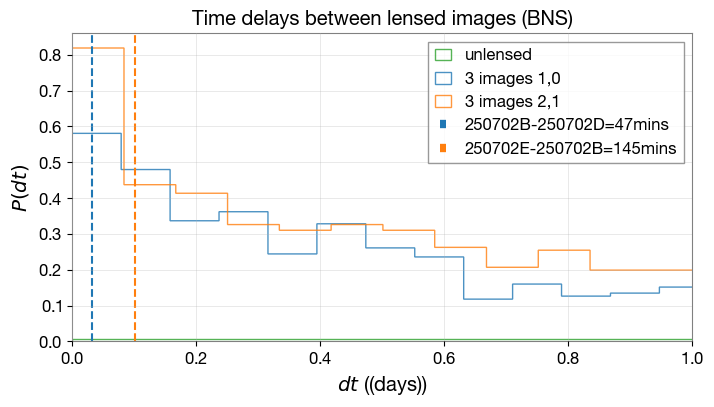

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# events

dt_10 = 13*60*60 + 56*60 + 5.77 - (13*60*60 + 9*60 + 2.03)
dt_21 = 16*60*60 + 21*60 + 33.07 - (13*60*60 + 56*60 + 5.77)

# plot histogram
plt.figure(figsize=(8, 4))

# unlensed events
plt.hist(dt_ul/(24*60*60), bins=30, alpha=0.8, density=True, histtype='step', color='C2', label='unlensed')

# lensed events
plt.hist(dt_3images_10/(24*60*60), bins=3000, alpha=0.8, density=True, histtype='step', color='C0', label='3 images 1,0')
plt.hist(dt_3images_21/(24*60*60), bins=3000, alpha=0.8, density=True, histtype='step', color='C1', label='3 images 2,1') 

plt.axvline(dt_10/(24*60*60), color='C0', linestyle='--', label='250702B-250702D=47mins')
plt.axvline(dt_21/(24*60*60), color='C1', linestyle='--', label='250702E-250702B=145mins')
# plt.xscale('log')
plt.xlim(0, 1)
plt.legend()
plt.grid(alpha=0.4)
plt.xlabel(r'$dt$ ((days))')
plt.ylabel(r'$P(dt)$')
plt.title('Time delays between lensed images (BNS)')
plt.show()

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_31810/1708753196.py:40: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(X, Y, Z, levels=contour_values, colors=['w', 'orange', 'red'], linewidths=1.5,


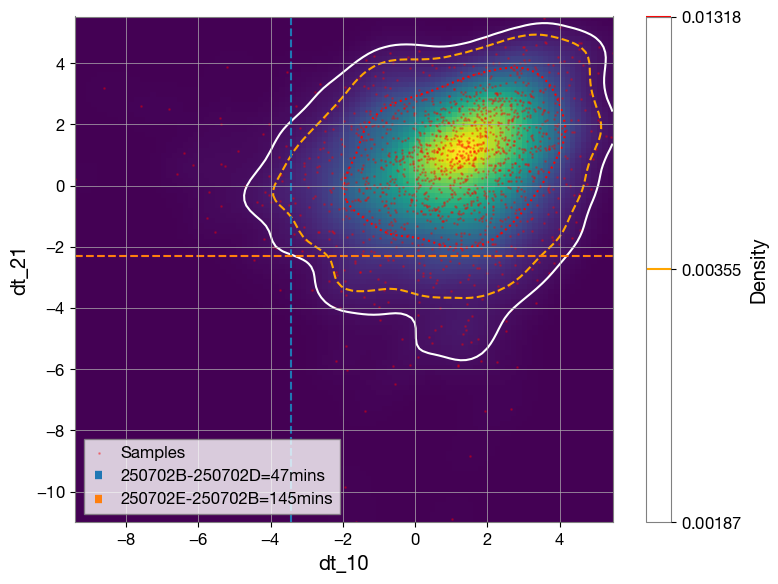

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Example data (replace with your actual arrays)
# dt_3images_10 = np.array([...])
# dt_3images_21 = np.array([...])

# 1. Stack the two distributions as a 2D array (shape: 2 x N)
values = np.vstack([np.log(dt_3images_10/(24*60*60)), np.log(dt_3images_21/(24*60*60))])

# 2. Create the 2D Gaussian KDE
kde = gaussian_kde(values)

# 3. Create a regular grid to evaluate KDE
xmin, xmax = np.log(dt_3images_10.min()/(24*60*60)), np.log(dt_3images_10.max()/(24*60*60))
ymin, ymax = np.log(dt_3images_21.min()/(24*60*60)), np.log(dt_3images_21.max()/(24*60*60))

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

# 4. Evaluate the KDE on the grid
Z = np.reshape(kde(positions).T, X.shape)

# 5. Plot the results
plt.figure(figsize=(8, 6))
plt.imshow(np.rot90(Z), 
           extent=[xmin, xmax, ymin, ymax],
           aspect='auto',
           cmap='viridis')

# Add contour levels for 68%, 90%, 95%
levels = [0.68, 0.90, 0.95]
Z_flat = Z.flatten()
Z_sorted = np.sort(Z_flat)[::-1]
Z_cumsum = np.cumsum(Z_sorted) / np.sum(Z_sorted)
contour_values = [Z_sorted[np.searchsorted(Z_cumsum, lvl)] for lvl in levels]
contour_values = np.sort(contour_values)  # Ensure increasing order

plt.contour(X, Y, Z, levels=contour_values, colors=['w', 'orange', 'red'], linewidths=1.5,
            linestyles=['solid', 'dashed', 'dotted'],
            labels=['68%', '90%', '95%'])
plt.colorbar(label='Density')
plt.scatter(np.log(dt_3images_10/(24*60*60)), np.log(dt_3images_21/(24*60*60)), c='r', s=1, alpha=0.3, label='Samples')

# plot np.log(dt_10/(24*60*60)), 
plt.axvline(np.log(dt_10/(24*60*60)), color='C0', linestyle='--', label='250702B-250702D=47mins')
plt.axhline(np.log(dt_21/(24*60*60)), color='C1', linestyle='--', label='250702E-250702B=145mins')


plt.xlabel('dt_10 (log$_{10}$(days))')
plt.ylabel('dt_21 (log$_{10}$(days))')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
import numpy as np

T0 = 24 * 60 * 60  # seconds per day

def kde_density_original_units(kde, t10_new, t21_new, T0=T0):
    """
    Evaluate the joint density in original (t10, t21) units given a KDE
    trained on [log(t10/T0), log(t21/T0)].

    Parameters
    ----------
    kde : scipy.stats.gaussian_kde
        KDE fitted on stacked log variables: np.vstack([log(t10/T0), log(t21/T0)]).
    t10_new, t21_new : array_like or float
        Target values in original time units (seconds), must be > 0.
    T0 : float
        Scaling constant used in training (default: seconds per day).

    Returns
    -------
    p_t : ndarray
        Density p_t(t10_new, t21_new) with shape = broadcast(t10_new, t21_new).
    """
    t1 = np.asarray(t10_new, dtype=float)
    t2 = np.asarray(t21_new, dtype=float)
    if np.any(t1 <= 0) or np.any(t2 <= 0):
        raise ValueError("t10_new and t21_new must be strictly positive for the log transform.")

    # Evaluate KDE in log-space
    x = np.log(t1 / T0)
    y = np.log(t2 / T0)
    XY = np.vstack([np.ravel(x), np.ravel(y)])
    p_log = kde(XY)  # gaussian_kde.__call__ supports 2×N input

    # Jacobian correction
    p_t = p_log / (np.ravel(t1) * np.ravel(t2))
    return p_t.reshape(np.broadcast(t1, t2).shape)


In [20]:
kde_density_original_units(kde, dt_10, dt_21)

array(7.33234423e-11)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Example data (replace with your actual arrays)
# dt_3images_10 = np.array([...])
# dt_3images_21 = np.array([...])

# 1. Stack the two distributions as a 2D array (shape: 2 x N)
values = np.vstack([np.log10(dt_ul/(24*60*60)), np.log10(dt_ul/(24*60*60))])

# avoid nan and inf values in the data
# avoid nan and inf values in the data
valid_idx = ~(np.isnan(values) | np.isinf(values))
values = values[valid_idx]

# 2. Create the 2D Gaussian KDE
kde_ul = gaussian_kde(values)


/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_31810/2215987074.py:10: RuntimeWarning: divide by zero encountered in log10
  values = np.vstack([np.log10(dt_ul/(24*60*60)), np.log10(dt_ul/(24*60*60))])


In [41]:
# 1. Stack the two distributions as a 2D array (shape: 2 x N)
dt = np.log(dt_ul/(24*60*60))
idx_ = ~(np.isnan(dt) | np.isinf(dt))
dt = dt[idx_]
values = np.vstack([dt, dt])

# 2. Create the 2D Gaussian KDE
kde_ul = gaussian_kde(values)

# 3. Create a regular grid to evaluate KDE
xmin, xmax = np.log(dt_ul.min()/(24*60*60)), np.log(dt_ul.max()/(24*60*60))
ymin, ymax = np.log(dt_ul.min()/(24*60*60)), np.log(dt_ul.max()/(24*60*60))

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_31810/1200899917.py:2: RuntimeWarning: divide by zero encountered in log
  dt = np.log(dt_ul/(24*60*60))
/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_31810/1200899917.py:11: RuntimeWarning: divide by zero encountered in log
  xmin, xmax = np.log(dt_ul.min()/(24*60*60)), np.log(dt_ul.max()/(24*60*60))
/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_31810/1200899917.py:12: RuntimeWarning: divide by zero encountered in log
  ymin, ymax = np.log(dt_ul.min()/(24*60*60)), np.log(dt_ul.max()/(24*60*60))
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/numpy/lib/index_tricks.py:186: RuntimeWarning: invalid value encountered in multiply
  nn[k] = (nn[k]*step+start)
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/numpy/lib/index_tricks.py:186: RuntimeWarning: invalid value encountered in add
  nn[k] = (nn[k]*step+start)


In [42]:
kde_density_original_units(kde_ul, dt_10, dt_21)

array(0.)

In [102]:
# simulating time delay difference and magnification ratio, for unlensed population
size = 20000

t = unlensed_params_detectable["geocent_time"]
mu = unlensed_params_detectable["luminosity_distance"]

len_ = len(t)
t_ = []
mu_ = []
idx1 = np.random.choice(np.arange(0,len_), size, replace=False)
idx2 = np.random.choice(np.arange(0,len_), size, replace=False)
t_.append(t[idx2] - t[idx1])
mu_.append(mu[idx2] / mu[idx1])

dt_ul_10 = np.abs(np.array(t_).flatten())


t_ = []
mu_ = []
idx1 = np.random.choice(np.arange(0,len_), size, replace=False)
idx2 = np.random.choice(np.arange(0,len_), size, replace=False)
t_.append(t[idx2] - t[idx1])
mu_.append(mu[idx2] / mu[idx1])

dt_ul_21 = np.abs(np.array(t_).flatten())

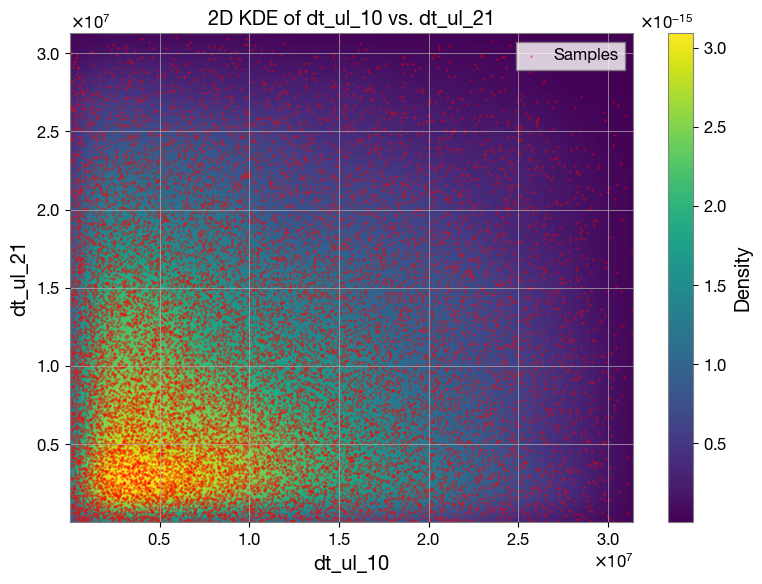

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. Stack the two distributions as a 2D array (shape: 2 x N)
values = np.vstack([dt_ul_10, dt_ul_21])

# 2. Create the 2D Gaussian KDE
kde = gaussian_kde(values)

# 3. Create a regular grid to evaluate KDE
xmin, xmax = dt_ul_10.min(), dt_ul_10.max()
ymin, ymax = dt_ul_21.min(), dt_ul_21.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

# 4. Evaluate the KDE on the grid
Z = np.reshape(kde(positions).T, X.shape)

# 5. Plot the results
plt.figure(figsize=(8, 6))
plt.imshow(np.rot90(Z), 
           extent=[xmin, xmax, ymin, ymax],
           aspect='auto',
           cmap='viridis')
plt.colorbar(label='Density')
plt.scatter(dt_ul_10, dt_ul_21, c='r', s=1, alpha=0.3, label='Samples')
plt.xlabel('dt_ul_10')
plt.ylabel('dt_ul_21')
plt.title('2D KDE of dt_ul_10 vs. dt_ul_21')
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
kde([dt_10, dt_21])

array([9.06043826e-16])

In [105]:
# find probability of using kde
dt_10 = 13*60*60 + 56*60 + 5.77 - (13*60*60 + 9*60 + 2.03)
dt_21 = 16*60*60 + 21*60 + 33.07 - (13*60*60 + 56*60 + 5.77)

kde([dt_10, dt_21])

array([9.06043826e-16])

In [ ]:
# RLU
3.40379951e-13/9.06043826e-16

375.6771374986445

In [107]:
# BLU*RLU
BF = 1390.3137*375.6771374986445
print(f"Bayes Factor: {BF:.4f}")
print(f"log10 BF: {np.log10(BF):.4f}") 

Bayes Factor: 522309.0710
log10 BF: 5.7179


In [55]:
# 4 images
# add accross all images
snr = lens_param_n['pdet_net']==1.
mu = ~np.isnan(lens_param_n['magnifications'])
type = lens_param_n['image_type']

# add accross all images
num_ = np.sum(mu, axis=1)
# select only 4 images
idx = num_ == 4
# get time information
dt_eff = lens_param_n['effective_geocent_time'][idx]
snr = lens_param_n['pdet_net'][idx]

dt_4images_10 = []
dt_4images_20 = []
dt_4images_30 = []
dt_4images_21 = []
dt_4images_31 = []
dt_4images_32 = []
dt_4images = []
for i, dt in enumerate(dt_eff):
    # image 1,0
    if snr[i, 1] == 1. and snr[i, 0] == 1.:
        dt_4images_10.append(abs(dt[1]-dt[0]))
    # image 2,0
    if snr[i, 2] == 1. and snr[i, 0] == 1.:
        dt_4images_20.append(abs(dt[2]-dt[0]))
    # image 3,0
    if snr[i, 3] == 1. and snr[i, 0] == 1.:
        dt_4images_30.append(abs(dt[3]-dt[0]))
    # image 2,1
    if snr[i, 2] == 1. and snr[i, 1]== 1.:
        dt_4images_21.append(abs(dt[2]-dt[1]))
    # image 3,1
    if snr[i, 3] == 1. and snr[i, 1]== 1.:
        dt_4images_31.append(abs(dt[3]-dt[1]))
    # image 3,2
    if snr[i, 3] == 1. and snr[i, 2]== 1.:
        dt_4images_32.append(abs(dt[3]-dt[2]))

dt_4images_10 = np.array(dt_4images_10)/(60)
dt_4images_20 = np.array(dt_4images_20)/(60)
dt_4images_30 = np.array(dt_4images_30)/(60)
dt_4images_21 = np.array(dt_4images_21)/(60)
dt_4images_31 = np.array(dt_4images_31)/(60)
dt_4images_32 = np.array(dt_4images_32)/(60)
dt_4images = np.concatenate([dt_4images_10, dt_4images_20, dt_4images_30, dt_4images_21, dt_4images_31, dt_4images_32])

In [57]:
# 1,0: 13:56:05.77-13:09:02.03
# 2,1: 14:49:31.91-13:56:05.77
# 3,2: 16:21:33.07-14:49:31.91

dt_10 = 13*60*60 + 56*60 + 5.77 - (13*60*60 + 9*60 + 2.03)
dt_21 = 14*60*60 + 49*60 + 31.91 - (13*60*60 + 56*60 + 5.77)
dt_32 = 16*60*60 + 21*60 + 33.07 - (14*60*60 + 49*60 + 31.91)
print(f"dt_10 = {dt_10/60} mins")
print(f"dt_21 = {dt_21/60} mins")
print(f"dt_32 = {dt_32/60} mins")

dt_10 = 47.0623333333333 mins
dt_21 = 53.435666666666776 mins
dt_32 = 92.01933333333326 mins


In [58]:
len(dt_4images_32)

937

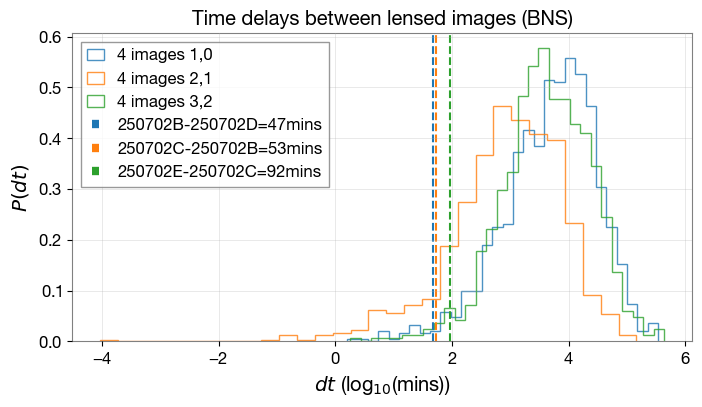

In [59]:
import numpy as np
import matplotlib.pyplot as plt
# plot histogram
plt.figure(figsize=(8, 4))
plt.hist(np.log10(dt_4images_10), bins=30, alpha=0.8, density=True, histtype='step', color='C0', label='4 images 1,0')
plt.hist(np.log10(dt_4images_21), bins=30, alpha=0.8, density=True, histtype='step', color='C1', label='4 images 2,1') 
plt.hist(np.log10(dt_4images_32), bins=30, alpha=0.8, density=True, histtype='step', color='C2', label='4 images 3,2')

plt.axvline(np.log10(dt_10/60), color='C0', linestyle='--', label='250702B-250702D=47mins')
plt.axvline(np.log10(dt_21/60), color='C1', linestyle='--', label='250702C-250702B=53mins')
plt.axvline(np.log10(dt_32/60), color='C2', linestyle='--', label='250702E-250702C=92mins')

plt.legend()
plt.grid(alpha=0.4)
plt.xlabel(r'$dt$ (log$_{10}$(mins))')
plt.ylabel(r'$P(dt)$')
plt.title('Time delays between lensed images (BNS)')
plt.show()